In [1]:
import bioframe as bf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pathlib import Path

In [2]:
K562_SPIN_STATES = Path("data/pre-processed/k562_spin_states.csv.gz") # from Wang et al. 2021, Genome Biology 10.1186/s13059-020-02253-3
GENCODEv29_GC = Path("data/pre-processed/gencodev29_gc.csv.gz")

k562_spin = pd.read_csv(K562_SPIN_STATES)
gencodev29_gc = pd.read_csv(GENCODEv29_GC)

In [3]:
gencodev29_gc_spin = bf.overlap(gencodev29_gc, k562_spin).dropna().rename(columns = {'name_':'SPIN states'})

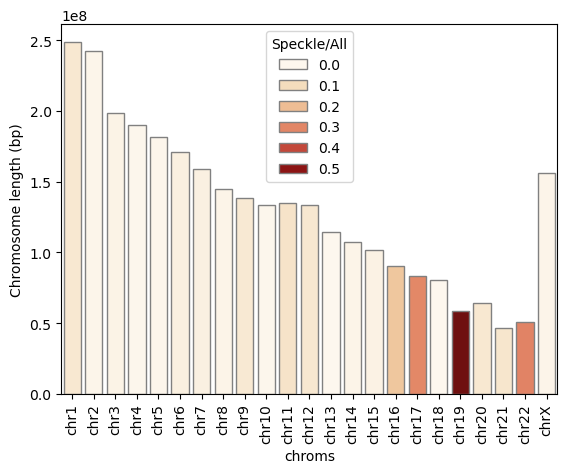

In [4]:
hg38 = bf.assembly_info("hg38")
hg38_chromsizes = hg38.chromsizes

speckle_content = (pd.concat([k562_spin[k562_spin.name == 'Speckle'].groupby('chrom')['length'].sum(), 
                            pd.Series(data=[0, 0], index=['chr13', 'chr18'])]) / 
        k562_spin.groupby('chrom')['length'].sum())

data = pd.concat([speckle_content, hg38.chromsizes], axis=1).dropna().rename(columns={0:'Speckle/All'})
data['chroms'] = data.index
order = ['chr'+str(x) for x in range(1,23)] + ['chrX']

ax = sns.barplot(data, 
                 x = 'chroms',
                 y = 'length', 
                 hue='Speckle/All', 
                 edgecolor='.5', 
                 palette='OrRd',
                 order=order
                )
ax.tick_params(axis='x', labelrotation = 90)
ax.set_ylabel('Chromosome length (bp)');